In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 

In [4]:
dataset = pd.read_csv('C:\\Users\\linco\\Downloads\\Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
# Getting some information about the dataset 
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


# Let us convert categorical variables i.e.,Gender , into numerical variables before applying a regression algorithm.  

In [13]:
# encoding Columns 
dataset.replace({'Gender':{'Male':0,'Female':1}},inplace=True) 

# To understand the relationship between different attributes in the dataset, we will plot a correlation matrix using the following code: 

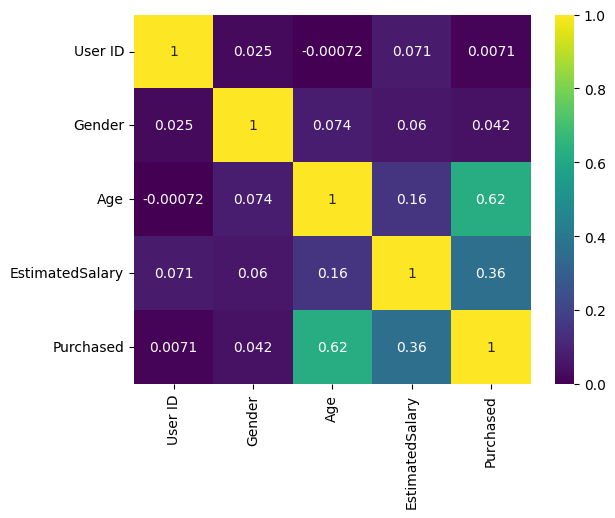

In [14]:
corrMatrix = dataset.corr() 
sns.heatmap(corrMatrix, annot=True, cmap="viridis") 
plt.show() 

<AxesSubplot: ylabel='Frequency'>

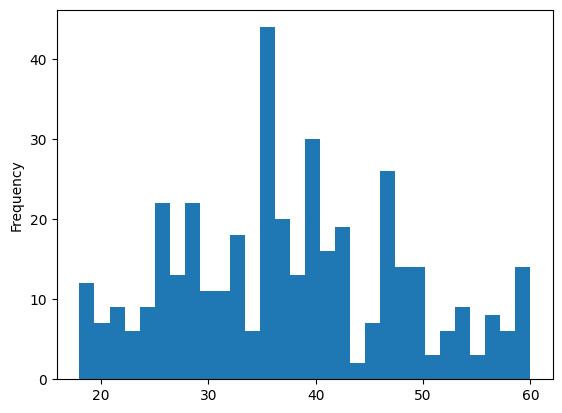

In [15]:
dataset['Age'].plot(kind="hist",bins=30)

In [39]:
dataset_attr=dataset.iloc[:,0:10]

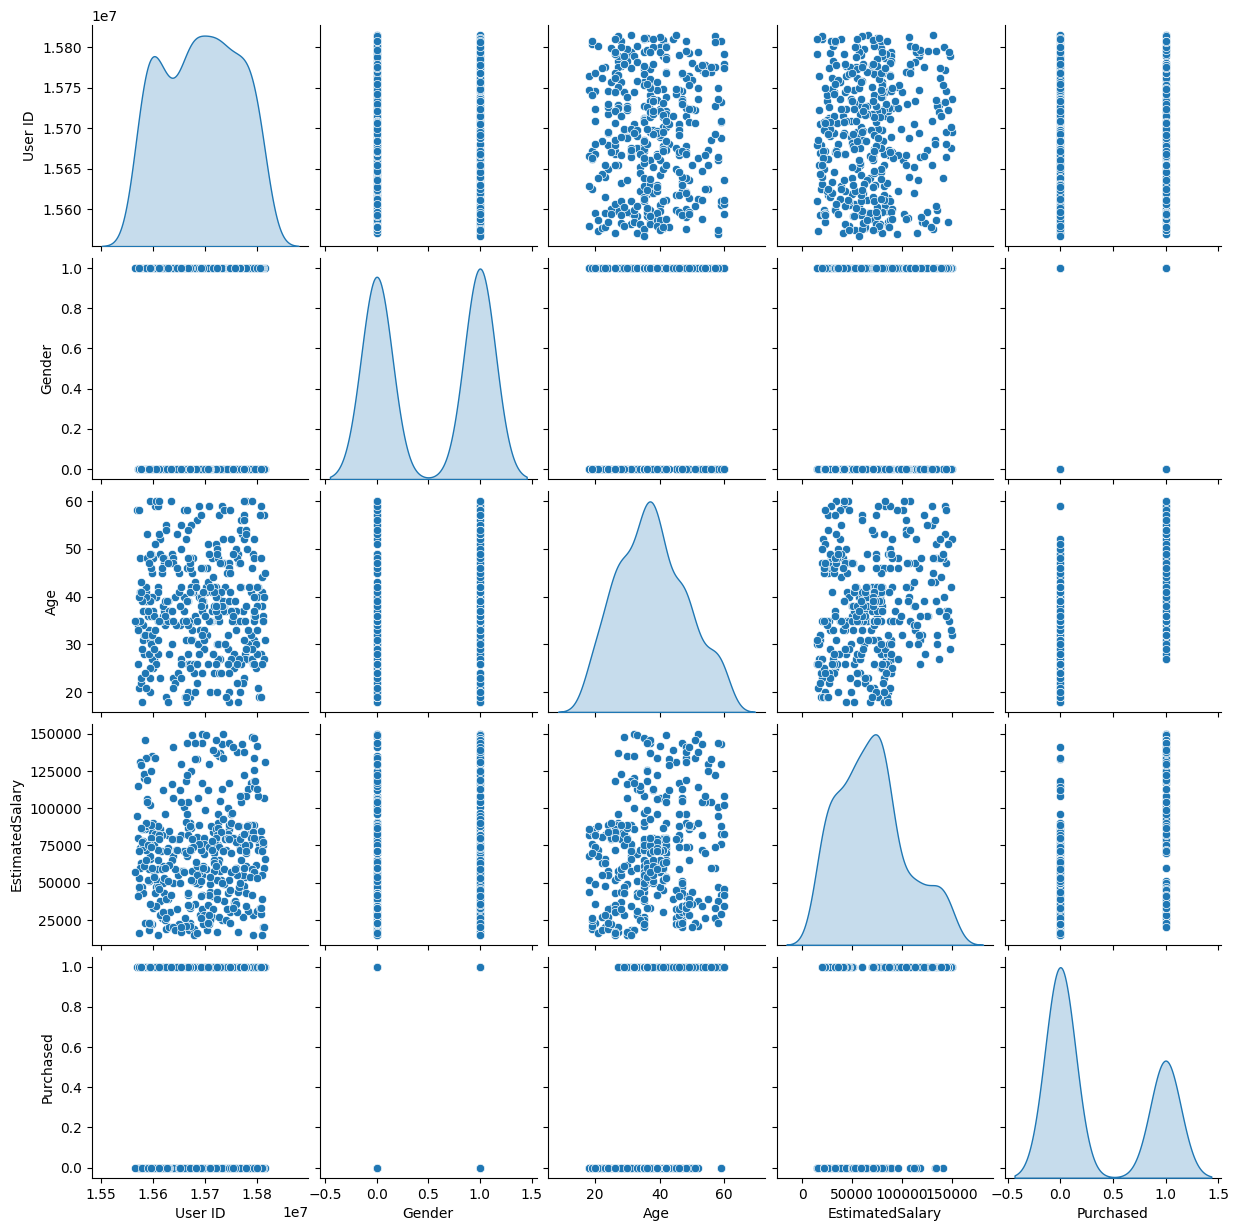

In [40]:
sns.pairplot(dataset_attr,diag_kind="kde")

In [16]:
print(dataset['Age'].corr(dataset['EstimatedSalary']))

0.1552380179721003


In [17]:
X=dataset.drop('EstimatedSalary',axis=1)
X

,User ID,Gender,Age,Purchased
0,15624510,0,19,0
1,15810944,0,35,0
2,15668575,1,26,0
3,15603246,1,27,0
4,15804002,0,19,0
...,...,...,...,...
395,15691863,1,46,1
396,15706071,0,51,1
397,15654296,1,50,1
398,15755018,0,36,0


In [18]:
Y=dataset[['EstimatedSalary']]
Y

,EstimatedSalary
0,19000
1,20000
2,43000
3,57000
4,76000
...,...
395,41000
396,23000
397,20000
398,33000


# Splitting the Dataset 
We will use an 80:20 split for training and testing the model 

In [19]:
X = dataset.drop(['Gender','EstimatedSalary'],axis=1) 
Y = dataset[['EstimatedSalary']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42) 

In [20]:
print(Y_test)

     EstimatedSalary
209            22000
280            88000
33             44000
210            96000
93             28000
..               ...
246            50000
227           133000
369            26000
176            47000
289            78000

[80 rows x 1 columns]


# We can call the Linear Regression module from the sklearn library using the following commands: 

In [21]:
# loading the linear regression model 
lin_reg_model = LinearRegression() 
#Now we can fit the model to our dataset 
lin_reg_model.fit(X_train,Y_train) 

LinearRegression()

# Once the training is completed, we can make predictions and print the r-squared error for regression-  

In [22]:
# prediction on Training data 
training_data_prediction = lin_reg_model.predict(X_train) 

In [23]:
# R squared Error 
train_error_score = metrics.r2_score(Y_train, training_data_prediction) 
print("R squared Error - Training : ", train_error_score) 

R squared Error - Training :  0.15487134157746296


In [24]:
# prediction on Training data 
Y_pred = lin_reg_model.predict(X_test) 

In [25]:
# R squared Error 
test_error_score = metrics.r2_score(Y_test, Y_pred) 
print("R squared Error - Test: ", test_error_score) 

R squared Error - Test:  0.0772155746215879


In [26]:
print(Y_test)

     EstimatedSalary
209            22000
280            88000
33             44000
210            96000
93             28000
..               ...
246            50000
227           133000
369            26000
176            47000
289            78000

[80 rows x 1 columns]


<AxesSubplot: xlabel='Age', ylabel='EstimatedSalary'>

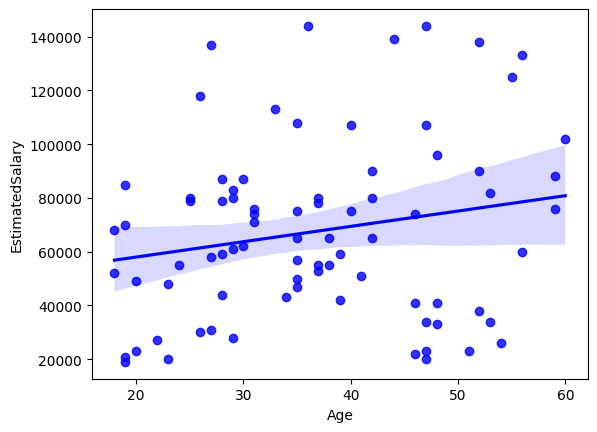

In [27]:
#To plot the best fit line, we will use the following code: 

# create scatterplot with regression line 
sns.regplot(x=X_test['Age'],y=Y_test['EstimatedSalary'],color="b")
#sns.regplot(Y_test,Y_pred, ci=None)

In [33]:
pip install -U numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


<AxesSubplot: xlabel='Age', ylabel='EstimatedSalary'>

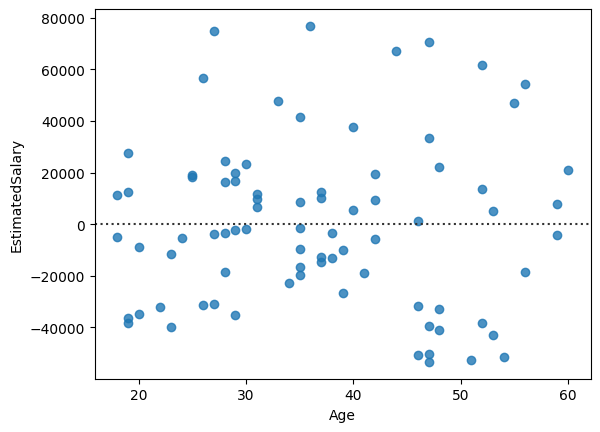

In [34]:
sns.residplot(x=X_test['Age'],y=Y_test['EstimatedSalary'])

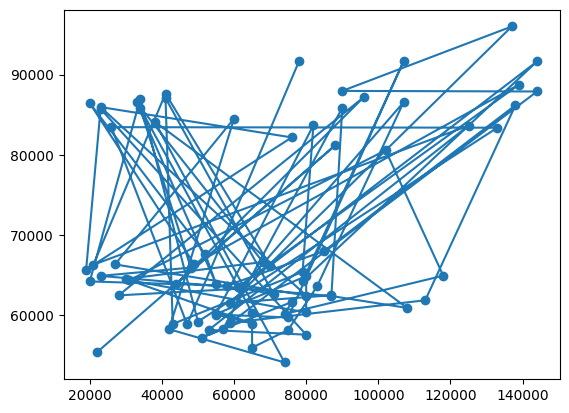

In [37]:
plt.scatter(Y_test,Y_pred)
plt.plot(Y_test,Y_pred)
plt.show()